## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/HAL.csv')
df.head()

,Date,Close
0,7/2/2018,44.470001
1,7/3/2018,44.529999
2,7/5/2018,44.450001
3,7/6/2018,44.930000
4,7/9/2018,45.830002


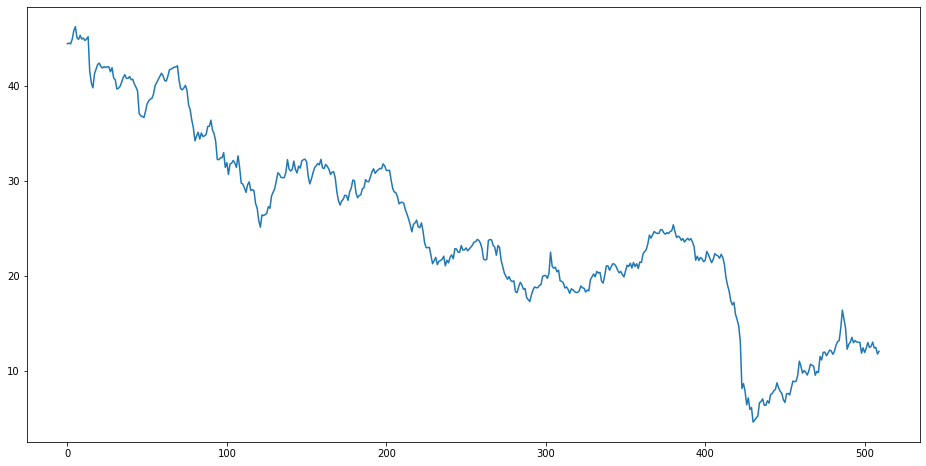

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,44.470001
1,2018-07-03,44.529999
2,2018-07-05,44.450001
3,2018-07-06,44.930000
4,2018-07-09,45.830002


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0812
Epoch 2/5
8/8 - 1s - loss: 0.0139
Epoch 3/5
8/8 - 1s - loss: 0.0091
Epoch 4/5
8/8 - 1s - loss: 0.0055
Epoch 5/5
8/8 - 1s - loss: 0.0040


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0053
Loss: 0.00533487880602479


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[20.650522],
       [37.89487 ],
       [28.382633],
       [27.643618],
       [33.763485],
       [26.638985],
       [29.762138],
       [21.587563],
       [19.85699 ],
       [30.204184],
       [27.416805],
       [24.807314],
       [20.76759 ],
       [22.091673],
       [20.639904],
       [20.61725 ],
       [37.2929  ],
       [26.602123],
       [24.633854],
       [23.694304],
       [26.827135],
       [29.685219],
       [28.89588 ],
       [22.530005],
       [27.675526],
       [22.335644],
       [28.274946],
       [32.86019 ],
       [19.761347],
       [20.410969],
       [29.512192],
       [36.967052],
       [29.029844],
       [19.341377],
       [29.66635 ],
       [29.611319],
       [30.315647],
       [37.04766 ],
       [22.559076],
       [27.365437],
       [30.795263],
       [34.10925 ],
       [21.545319],
       [19.44692 ],
       [20.845314],
       [22.469206],
       [19.59953 ],
       [37.611042],
       [20.696922],
       [27.92112 ],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,20.650522
1,37.894871
2,28.382633
3,27.643618
4,33.763485
...,...
73,32.932972
74,34.942253
75,19.075123
76,28.554968


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[19.9     ],
       [42.139999],
       [28.98    ],
       [25.85    ],
       [34.68    ],
       [26.360001],
       [29.700001],
       [22.84    ],
       [21.030001],
       [31.43    ],
       [30.35    ],
       [24.74    ],
       [20.99    ],
       [24.35    ],
       [20.620001],
       [20.530001],
       [41.799999],
       [25.360001],
       [23.51    ],
       [22.17    ],
       [30.700001],
       [31.25    ],
       [31.290001],
       [23.790001],
       [30.360001],
       [21.549999],
       [28.09    ],
       [34.16    ],
       [19.440001],
       [19.27    ],
       [30.290001],
       [41.049999],
       [32.099998],
       [18.25    ],
       [30.200001],
       [31.32    ],
       [31.889999],
       [37.540001],
       [23.85    ],
       [30.1     ],
       [31.799999],
       [35.060001],
       [21.379999],
       [20.27    ],
       [20.790001],
       [23.6     ],
       [18.6     ],
       [42.      ],
       [20.48    ],
       [30.9     ],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,20.650522,19.900000
1,37.894871,42.139999
2,28.382633,28.980000
3,27.643618,25.850000
4,33.763485,34.680000
...,...,...
73,32.932972,36.410000
74,34.942253,35.139999
75,19.075123,18.950001
76,28.554968,29.090000


In [16]:
lstm_model.save("../models/HAL_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[22.811499 ],
       [23.010492 ],
       [23.196615 ],
       [23.365114 ],
       [23.50263  ],
       [23.606657 ],
       [23.688118 ],
       [23.746529 ],
       [23.793478 ],
       [23.834373 ],
       [23.892076 ],
       [23.935465 ],
       [23.94468  ],
       [23.931967 ],
       [23.900774 ],
       [23.84525  ],
       [23.781782 ],
       [23.703781 ],
       [23.626747 ],
       [23.55922  ],
       [23.495956 ],
       [23.444057 ],
       [23.39151  ],
       [23.322773 ],
       [23.194563 ],
       [23.041504 ],
       [22.861244 ],
       [22.681015 ],
       [22.504372 ],
       [22.330042 ],
       [22.1695   ],
       [22.057644 ],
       [21.975908 ],
       [21.904533 ],
       [21.829113 ],
       [21.76334  ],
       [21.726976 ],
       [21.709637 ],
       [21.70448  ],
       [21.699915 ],
       [21.708487 ],
       [21.71409  ],
       [21.694284 ],
       [21.607395 ],
       [21.446127 ],
       [21.215044 ],
       [20.910141 ],
       [20.55

In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,24.480000
371,2019-12-20,24.490000
372,2019-12-23,24.889999
373,2019-12-24,24.860001
374,2019-12-26,24.540001
...,...,...
505,2020-07-06,13.030000
506,2020-07-07,12.410000
507,2020-07-08,12.470000
508,2020-07-09,11.780000


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,24.480000,22.811499
371,2019-12-20,24.490000,23.010492
372,2019-12-23,24.889999,23.196615
373,2019-12-24,24.860001,23.365114
374,2019-12-26,24.540001,23.502630
...,...,...,...
505,2020-07-06,13.030000,14.498170
506,2020-07-07,12.410000,14.478911
507,2020-07-08,12.470000,14.460625
508,2020-07-09,11.780000,14.423659


In [23]:
forecast_data.to_csv("../data/predictions/HAL.csv")

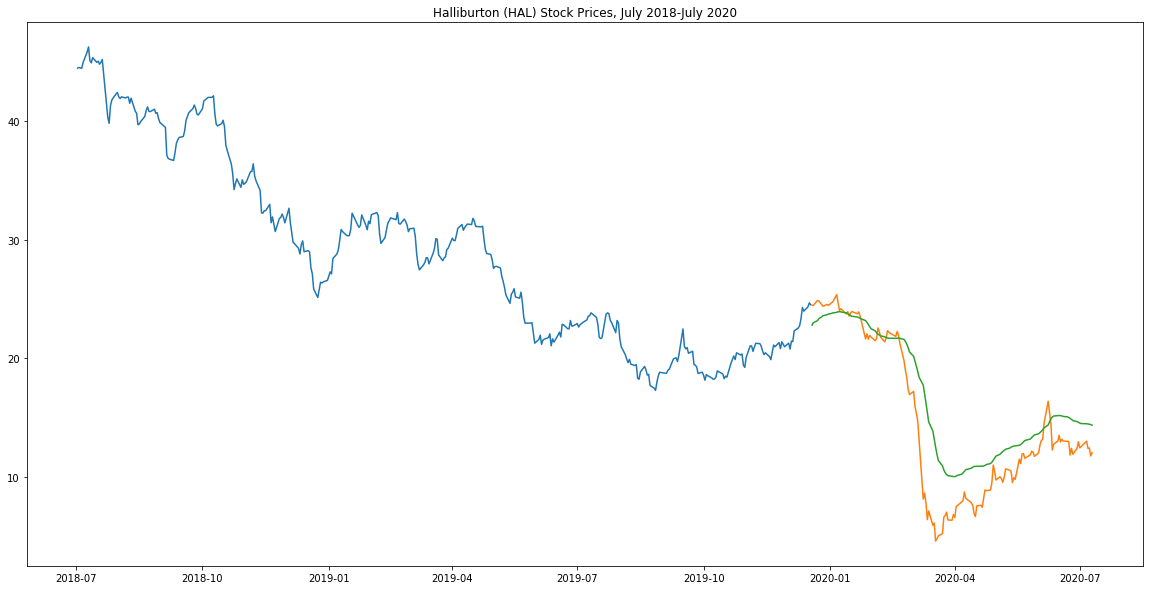

In [24]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Halliburton (HAL) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/HAL.png")